Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz


/usr/lib/python2.7/gzip.py:275: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  chunk = self.extrabuf[offset: offset + size]
input_data.py:35: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  data = data.reshape(num_images, rows, cols, 1)


Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
('Epoch:', '0001', 'cost=', '2.105116159')
('Epoch:', '0002', 'cost=', '0.571378704')
('Epoch:', '0003', 'cost=', '0.381379273')
('Epoch:', '0004', 'cost=', '0.280888591')
('Epoch:', '0005', 'cost=', '0.216385195')
('Epoch:', '0006', 'cost=', '0.169743154')
('Epoch:', '0007', 'cost=', '0.134992604')
('Epoch:', '0008', 'cost=', '0.107714656')
('Epoch:', '0009', 'cost=', '0.085855111')
('Epoch:', '0010', 'cost=', '0.068086007')
('Epoch:', '0011', 'cost=', '0.053925817')
('Epoch:', '0012', 'cost=', '0.042132142')
('Epoch:', '0013', 'cost=', '0.033265800')
('Epoch:', '0014', 'cost=', '0.026069025')
('Epoch:', '0015', 'cost=', '0.020257576')
('Epoch:', '0016', 'cost=', '0.015452029')
('Epoch:', '0017', 'cost=', '0.012124458')
('Epoch:', '0018', 'cost=', '0.009336213')
('Epoch:', '0019', 'cost=', '0.007308816')
('Epoch:', '0020', 'cost=', '0.005529023')
Training phase finished


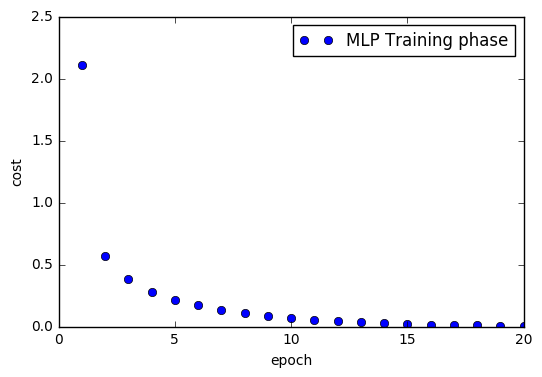

('Model Accuracy:', 0.94630003)


In [2]:
# Import MINST data
import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

import tensorflow as tf
import matplotlib.pyplot as plt

# Parameters
learning_rate = 0.001
training_epochs = 20
batch_size = 100
display_step = 1

# Network Parameters
n_hidden_1 = 256 # 1st layer num features
n_hidden_2 = 256 # 2nd layer num features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

#weights layer 1
h = tf.Variable(tf.random_normal([n_input, n_hidden_1]))
#bias layer 1
bias_layer_1 = tf.Variable(tf.random_normal([n_hidden_1]))
#layer 1
layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x,h),bias_layer_1))

#weights layer 2
w = tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2]))
#bias layer 2
bias_layer_2 = tf.Variable(tf.random_normal([n_hidden_2]))
#layer 2
layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1,w),bias_layer_2))

#weights output layer
output = tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
#biar output layer
bias_output = tf.Variable(tf.random_normal([n_classes]))
#output layer
output_layer = tf.matmul(layer_2, output) + bias_output

# cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(output_layer, y))
# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost) 
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)


#Plot settings
avg_set = []
epoch_set=[]
    
# Initializing the variables
init = tf.initialize_all_variables()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Fit training using batch data
            sess.run(optimizer, feed_dict={x: batch_xs, y: batch_ys})
            # Compute average loss
            avg_cost += sess.run(cost, feed_dict={x: batch_xs, y: batch_ys})/total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
        avg_set.append(avg_cost)
        epoch_set.append(epoch+1)
    print("Training phase finished")

    plt.plot(epoch_set,avg_set, 'o', label='MLP Training phase')
    plt.ylabel('cost')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()
        
    # Test model
    correct_prediction = tf.equal(tf.argmax(output_layer, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Model Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
